In [12]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8-darkgrid")

#Download stock data

ticker= "AAPL"
data = yf.download(ticker, start="2020-01-01", end ="2025-01-01")
data = data.reset_index() # Reset the index to make 'Date' a column
data = data['Close'].dropna() # Access the 'Close' column instead of 'Adj Close'

#calculate daily returns
returns = data.pct_change().dropna()

#display basic stats
print("Mean Daily Return:",returns.mean())
print("Variance of Returns:",returns.var())
print("Volatility(Std Dev):",returns.std())

/tmp/ipython-input-2621226689.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start="2020-01-01", end ="2025-01-01")
[*********************100%***********************]  1 of 1 completed

Mean Daily Return: Ticker
AAPL    0.001182
dtype: float64
Variance of Returns: Ticker
AAPL    0.000398
dtype: float64
Volatility(Std Dev): Ticker
AAPL    0.019956
dtype: float64


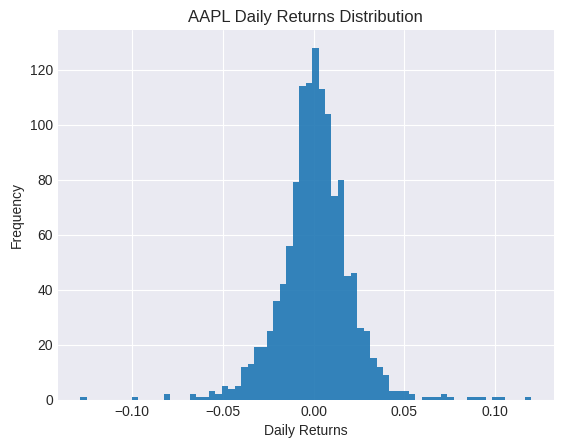

In [13]:
plt.hist(returns, bins=70, alpha=0.9 )
plt.title(f"{ticker} Daily Returns Distribution")
plt.xlabel("Daily Returns")
plt.ylabel("Frequency")
plt.show()

In [8]:
trading_days = 252

mean_annual_return = returns.mean() * trading_days

annual_volatility = returns.std() * np.sqrt(trading_days)

print("Annualised Mean Return:", mean_annual_return)
print("Annualised Volatility:", annual_volatility)

Annualised Mean Return: Ticker
AAPL    0.258011
dtype: float64
Annualised Volatility: Ticker
AAPL    0.369334
dtype: float64


In [9]:
#Sharpe Ratio (Assuming Risk-Free Rate ~ 0%)
sharpe_ratio = mean_annual_return / annual_volatility
print("Sharpe Ratio:", sharpe_ratio)

Sharpe Ratio: Ticker
AAPL    0.698584
dtype: float64


Max Drawdown: Ticker
AAPL   -0.314273
dtype: float64


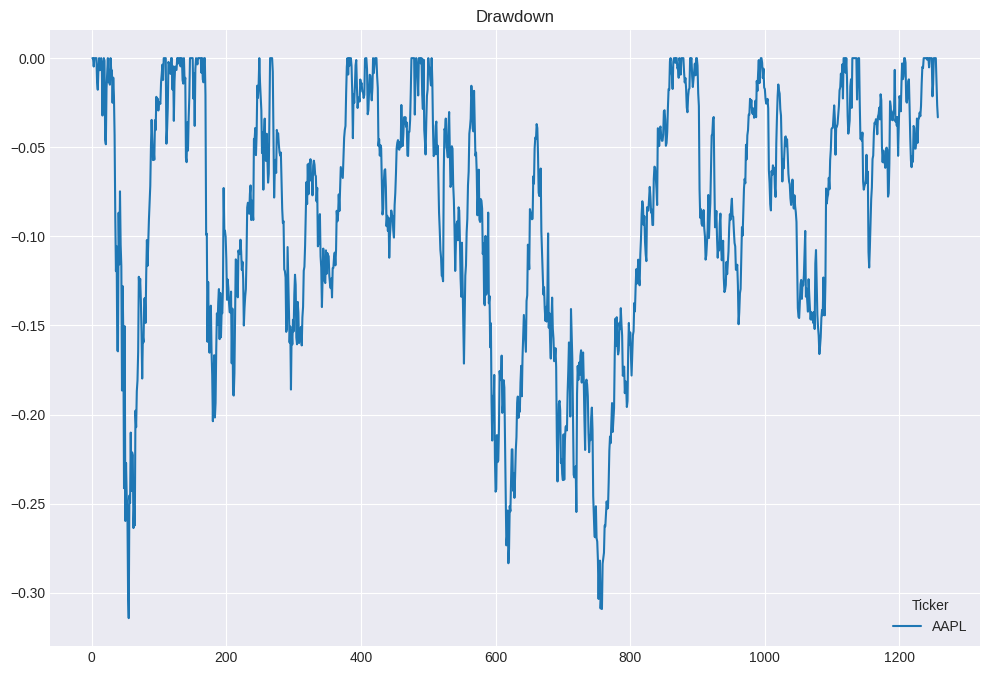

In [14]:
# Max draw calculation
cumulative = (1 + returns).cumprod()
running_max = cumulative.cummax()
drawdown = (cumulative - running_max) / running_max
max_drawdown = drawdown.min()
print("Max Drawdown:", max_drawdown)

#plot drawdown
drawdown.plot(figsize=(12,8), title ="Drawdown")

plt.show()